In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
t = np.linspace(0,60*60*3,1000)
K = 0.1
lam = 0.05/60
t_s = 30*60
tau = -np.log( (2**(lam/K)-1) / (np.exp(lam*t_s)-2**(lam/K)) ) / lam

gamma = K / (1+np.exp(-lam*(t-tau)))

dt = t[1]-t[0]
integral = np.array([np.sum(gamma[:i])*dt for i in range(t.size)])
gama_tile = np.tile(gamma[:, None, None], (1, 2, 2))

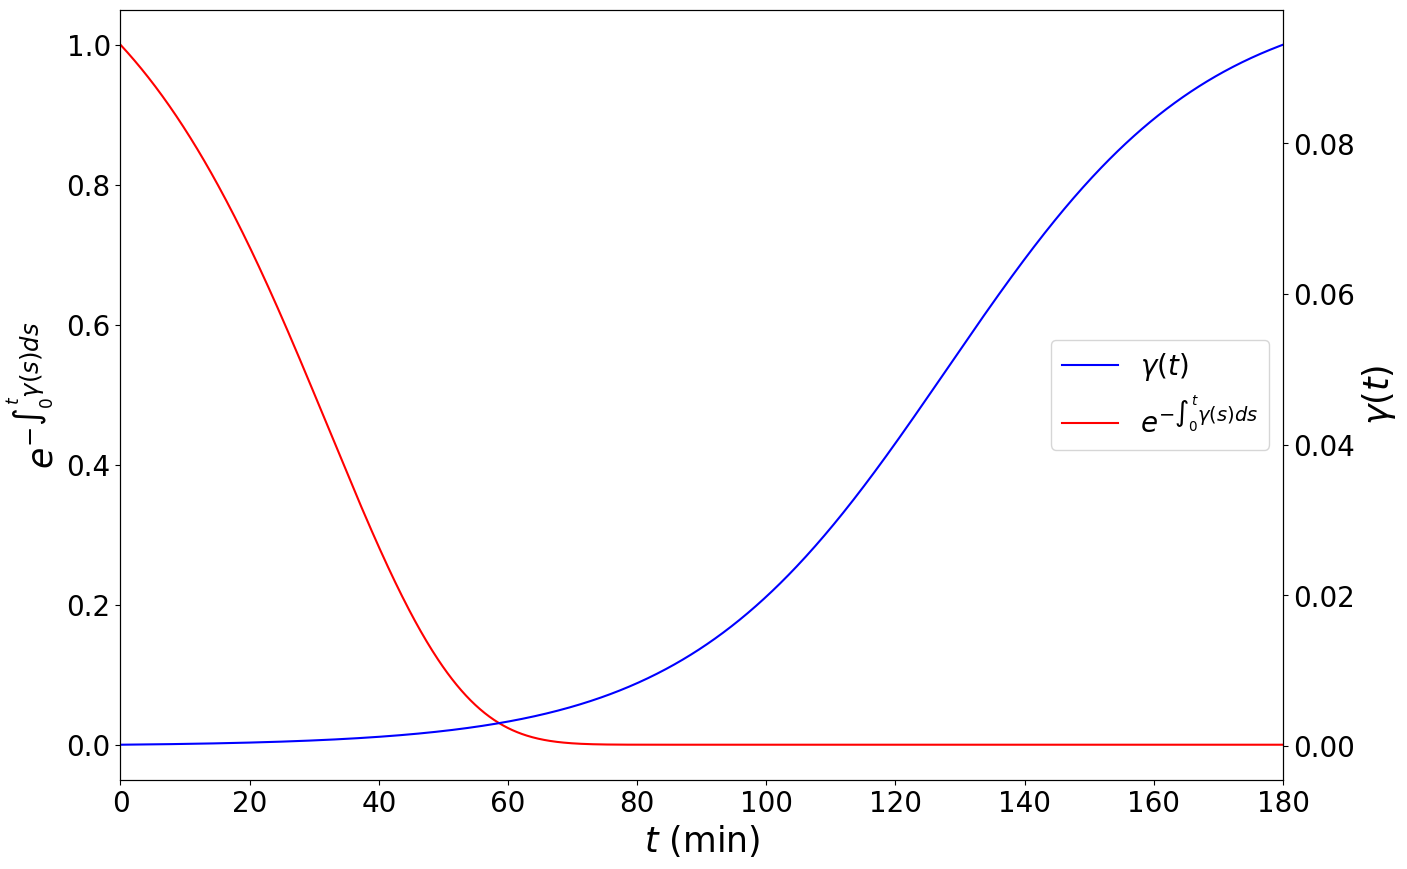

In [3]:
fontsize=25
fig, ax2 = plt.subplots(figsize=(15, 10))

ax2.plot(t/60,np.exp(-integral),'r',label='$e^{-\int_0^t\gamma(s)ds}$')
ax2.set_ylabel('$e^{-\int_0^t\gamma(s)ds}$', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize - 5)
#ax2.set_yscale("log")
ax2.set_xlim(np.min(t/60), np.max(t/60))

ax1 = ax2.twinx()
ax1.plot(t/60,gamma,'b',label='$\gamma(t)$')
ax2.set_xlabel('$t$ (min)', fontsize=fontsize)
ax1.set_ylabel('$\gamma(t)$', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize - 5)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax2.legend(line1+line2,label1+label2, loc='center right', prop={'size': fontsize - 5})

#path = 'TO BE DEFINED'
#file_name = 'density_vs_time'
#plt.savefig(Path(path) / f"{file_name}.pdf", format='pdf')